## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  14.508463  1409.590595  0.874551  10.801121  1.512761
1  57.277727   128.475042  0.089119   3.634813  0.182787
2  86.044768  1252.438529  0.918783  10.607957  1.591519
3  91.232833  1378.545883  0.692234  10.703451  1.450493
4  34.091239   896.962154  0.824480   4.028082  1.401217


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.34495 | train_mse: 7.10161 | train_mae: 1.57812 |  0:00:00s
epoch 1  | loss: 1.10254 | train_mse: 2.73569 | train_mae: 1.18012 |  0:00:00s
epoch 2  | loss: 0.78007 | train_mse: 3.12893 | train_mae: 1.32537 |  0:00:00s


epoch 3  | loss: 0.70558 | train_mse: 2.48686 | train_mae: 1.19127 |  0:00:00s
epoch 4  | loss: 0.68828 | train_mse: 2.47133 | train_mae: 1.08916 |  0:00:00s
epoch 5  | loss: 0.70448 | train_mse: 2.49588 | train_mae: 1.05867 |  0:00:00s


epoch 6  | loss: 0.68259 | train_mse: 2.07105 | train_mae: 0.97136 |  0:00:00s
epoch 7  | loss: 0.49956 | train_mse: 1.4682  | train_mae: 0.83134 |  0:00:00s
epoch 8  | loss: 0.53602 | train_mse: 0.60418 | train_mae: 0.56641 |  0:00:00s


epoch 9  | loss: 0.48833 | train_mse: 0.8355  | train_mae: 0.63678 |  0:00:00s
epoch 10 | loss: 0.52156 | train_mse: 0.92    | train_mae: 0.66448 |  0:00:01s
epoch 11 | loss: 0.42582 | train_mse: 0.46034 | train_mae: 0.50881 |  0:00:01s


epoch 12 | loss: 0.3844  | train_mse: 0.32147 | train_mae: 0.42983 |  0:00:01s
epoch 13 | loss: 0.22933 | train_mse: 0.45529 | train_mae: 0.47283 |  0:00:01s
epoch 14 | loss: 0.27332 | train_mse: 0.47685 | train_mae: 0.48758 |  0:00:01s


epoch 15 | loss: 0.54446 | train_mse: 0.39882 | train_mae: 0.44992 |  0:00:01s
epoch 16 | loss: 0.33791 | train_mse: 0.64046 | train_mae: 0.5733  |  0:00:01s
epoch 17 | loss: 0.24095 | train_mse: 0.91104 | train_mae: 0.6401  |  0:00:01s


epoch 18 | loss: 0.23901 | train_mse: 0.95944 | train_mae: 0.65087 |  0:00:01s
epoch 19 | loss: 0.33182 | train_mse: 0.83407 | train_mae: 0.61158 |  0:00:01s
epoch 20 | loss: 0.32108 | train_mse: 0.48229 | train_mae: 0.47654 |  0:00:01s


epoch 21 | loss: 0.35154 | train_mse: 0.3194  | train_mae: 0.41884 |  0:00:01s
epoch 22 | loss: 0.23315 | train_mse: 0.33297 | train_mae: 0.42256 |  0:00:02s
epoch 23 | loss: 0.32013 | train_mse: 0.39719 | train_mae: 0.41194 |  0:00:02s


epoch 24 | loss: 0.24223 | train_mse: 0.28731 | train_mae: 0.36559 |  0:00:02s
epoch 25 | loss: 0.24293 | train_mse: 0.30533 | train_mae: 0.42152 |  0:00:02s
epoch 26 | loss: 0.36987 | train_mse: 0.29799 | train_mae: 0.40133 |  0:00:02s


epoch 27 | loss: 0.24381 | train_mse: 0.27335 | train_mae: 0.38335 |  0:00:02s
epoch 28 | loss: 0.37449 | train_mse: 0.25807 | train_mae: 0.36979 |  0:00:02s
epoch 29 | loss: 0.41899 | train_mse: 0.23982 | train_mae: 0.3875  |  0:00:02s


epoch 30 | loss: 0.20959 | train_mse: 0.21715 | train_mae: 0.3686  |  0:00:02s
epoch 31 | loss: 0.22779 | train_mse: 0.21298 | train_mae: 0.3618  |  0:00:02s
epoch 32 | loss: 0.18244 | train_mse: 0.20973 | train_mae: 0.35098 |  0:00:02s


epoch 33 | loss: 0.20834 | train_mse: 0.21817 | train_mae: 0.34069 |  0:00:02s
epoch 34 | loss: 0.20154 | train_mse: 0.25073 | train_mae: 0.3445  |  0:00:03s
epoch 35 | loss: 0.16327 | train_mse: 0.27046 | train_mae: 0.35892 |  0:00:03s


epoch 36 | loss: 0.21375 | train_mse: 0.18852 | train_mae: 0.33364 |  0:00:03s
epoch 37 | loss: 0.24859 | train_mse: 0.21279 | train_mae: 0.34428 |  0:00:03s


epoch 38 | loss: 0.25099 | train_mse: 0.34682 | train_mae: 0.35353 |  0:00:03s
epoch 39 | loss: 0.26743 | train_mse: 0.38582 | train_mae: 0.38079 |  0:00:03s
epoch 40 | loss: 0.21603 | train_mse: 0.33698 | train_mae: 0.39557 |  0:00:03s


epoch 41 | loss: 0.26762 | train_mse: 0.27421 | train_mae: 0.37497 |  0:00:03s
epoch 42 | loss: 0.26022 | train_mse: 0.26921 | train_mae: 0.35129 |  0:00:03s
epoch 43 | loss: 0.37194 | train_mse: 0.19288 | train_mae: 0.30968 |  0:00:03s


epoch 44 | loss: 0.27801 | train_mse: 0.22765 | train_mae: 0.35817 |  0:00:03s
epoch 45 | loss: 0.21351 | train_mse: 0.27953 | train_mae: 0.37601 |  0:00:03s
epoch 46 | loss: 0.31493 | train_mse: 0.32714 | train_mae: 0.41095 |  0:00:04s


epoch 47 | loss: 0.27313 | train_mse: 0.45279 | train_mae: 0.43624 |  0:00:04s
epoch 48 | loss: 0.31318 | train_mse: 0.47478 | train_mae: 0.43354 |  0:00:04s
epoch 49 | loss: 0.39942 | train_mse: 0.33034 | train_mae: 0.3921  |  0:00:04s


epoch 50 | loss: 0.50351 | train_mse: 0.21568 | train_mae: 0.33453 |  0:00:04s
epoch 51 | loss: 0.21495 | train_mse: 0.22037 | train_mae: 0.35053 |  0:00:04s
epoch 52 | loss: 0.24429 | train_mse: 0.18415 | train_mae: 0.32829 |  0:00:04s


epoch 53 | loss: 0.16709 | train_mse: 0.15794 | train_mae: 0.30977 |  0:00:04s
epoch 54 | loss: 0.22074 | train_mse: 0.1943  | train_mae: 0.33327 |  0:00:04s


epoch 55 | loss: 0.21674 | train_mse: 0.20249 | train_mae: 0.33592 |  0:00:04s
epoch 56 | loss: 0.31836 | train_mse: 0.21343 | train_mae: 0.34087 |  0:00:04s
epoch 57 | loss: 0.3106  | train_mse: 0.22252 | train_mae: 0.33939 |  0:00:05s


epoch 58 | loss: 0.38713 | train_mse: 0.20181 | train_mae: 0.33038 |  0:00:05s


epoch 59 | loss: 0.26036 | train_mse: 0.21484 | train_mae: 0.34626 |  0:00:05s
epoch 60 | loss: 0.35064 | train_mse: 0.24641 | train_mae: 0.35615 |  0:00:05s


epoch 61 | loss: 0.25811 | train_mse: 0.18969 | train_mae: 0.31577 |  0:00:05s
epoch 62 | loss: 0.23152 | train_mse: 0.15963 | train_mae: 0.29306 |  0:00:05s


epoch 63 | loss: 0.20367 | train_mse: 0.15353 | train_mae: 0.2849  |  0:00:05s
epoch 64 | loss: 0.19358 | train_mse: 0.15651 | train_mae: 0.29593 |  0:00:05s


epoch 65 | loss: 0.17276 | train_mse: 0.15597 | train_mae: 0.30942 |  0:00:05s
epoch 66 | loss: 0.14743 | train_mse: 0.1401  | train_mae: 0.30117 |  0:00:06s
epoch 67 | loss: 0.25829 | train_mse: 0.15703 | train_mae: 0.29291 |  0:00:06s


epoch 68 | loss: 0.1408  | train_mse: 0.15471 | train_mae: 0.28911 |  0:00:06s
epoch 69 | loss: 0.14555 | train_mse: 0.166   | train_mae: 0.29382 |  0:00:06s
epoch 70 | loss: 0.19515 | train_mse: 0.12273 | train_mae: 0.26734 |  0:00:06s


epoch 71 | loss: 0.16855 | train_mse: 0.12072 | train_mae: 0.27265 |  0:00:06s
epoch 72 | loss: 0.1279  | train_mse: 0.1301  | train_mae: 0.28031 |  0:00:06s
epoch 73 | loss: 0.16597 | train_mse: 0.1167  | train_mae: 0.26777 |  0:00:06s


epoch 74 | loss: 0.14097 | train_mse: 0.11336 | train_mae: 0.26149 |  0:00:06s
epoch 75 | loss: 0.21601 | train_mse: 0.11984 | train_mae: 0.27057 |  0:00:06s
epoch 76 | loss: 0.30394 | train_mse: 0.12105 | train_mae: 0.27372 |  0:00:06s


epoch 77 | loss: 0.17856 | train_mse: 0.11325 | train_mae: 0.25304 |  0:00:06s
epoch 78 | loss: 0.26125 | train_mse: 0.11569 | train_mae: 0.25438 |  0:00:07s
epoch 79 | loss: 0.16295 | train_mse: 0.11316 | train_mae: 0.25355 |  0:00:07s


epoch 80 | loss: 0.14465 | train_mse: 0.09786 | train_mae: 0.24687 |  0:00:07s
epoch 81 | loss: 0.12071 | train_mse: 0.09634 | train_mae: 0.24137 |  0:00:07s
epoch 82 | loss: 0.16632 | train_mse: 0.09696 | train_mae: 0.23988 |  0:00:07s


epoch 83 | loss: 0.13199 | train_mse: 0.10229 | train_mae: 0.24575 |  0:00:07s
epoch 84 | loss: 0.10981 | train_mse: 0.09564 | train_mae: 0.24168 |  0:00:07s
epoch 85 | loss: 0.10302 | train_mse: 0.08825 | train_mae: 0.23856 |  0:00:07s


epoch 86 | loss: 0.21441 | train_mse: 0.13606 | train_mae: 0.2916  |  0:00:07s
epoch 87 | loss: 0.20033 | train_mse: 0.16694 | train_mae: 0.3119  |  0:00:07s
epoch 88 | loss: 0.14049 | train_mse: 0.12618 | train_mae: 0.28429 |  0:00:07s


epoch 89 | loss: 0.30274 | train_mse: 0.12614 | train_mae: 0.28601 |  0:00:07s
epoch 90 | loss: 0.18501 | train_mse: 0.14473 | train_mae: 0.30196 |  0:00:08s
epoch 91 | loss: 0.22008 | train_mse: 0.12088 | train_mae: 0.27848 |  0:00:08s


epoch 92 | loss: 0.21943 | train_mse: 0.11088 | train_mae: 0.27022 |  0:00:08s
epoch 93 | loss: 0.18173 | train_mse: 0.10538 | train_mae: 0.26328 |  0:00:08s
epoch 94 | loss: 0.13757 | train_mse: 0.10001 | train_mae: 0.25393 |  0:00:08s


epoch 95 | loss: 0.13135 | train_mse: 0.09068 | train_mae: 0.23666 |  0:00:08s
epoch 96 | loss: 0.14945 | train_mse: 0.09688 | train_mae: 0.23998 |  0:00:08s
epoch 97 | loss: 0.17159 | train_mse: 0.11738 | train_mae: 0.2499  |  0:00:08s


epoch 98 | loss: 0.15003 | train_mse: 0.14056 | train_mae: 0.27136 |  0:00:08s
epoch 99 | loss: 0.14813 | train_mse: 0.15741 | train_mae: 0.29063 |  0:00:08s
epoch 100| loss: 0.26209 | train_mse: 0.14268 | train_mae: 0.27406 |  0:00:08s


epoch 101| loss: 0.15556 | train_mse: 0.11448 | train_mae: 0.24949 |  0:00:08s
epoch 102| loss: 0.23283 | train_mse: 0.09292 | train_mae: 0.23972 |  0:00:09s
epoch 103| loss: 0.1015  | train_mse: 0.09262 | train_mae: 0.2415  |  0:00:09s


epoch 104| loss: 0.139   | train_mse: 0.09758 | train_mae: 0.24382 |  0:00:09s
epoch 105| loss: 0.15988 | train_mse: 0.09381 | train_mae: 0.24092 |  0:00:09s
epoch 106| loss: 0.23236 | train_mse: 0.09572 | train_mae: 0.23797 |  0:00:09s


epoch 107| loss: 0.23156 | train_mse: 0.10306 | train_mae: 0.24163 |  0:00:09s
epoch 108| loss: 0.11864 | train_mse: 0.09899 | train_mae: 0.2345  |  0:00:09s
epoch 109| loss: 0.13432 | train_mse: 0.10044 | train_mae: 0.23608 |  0:00:09s


epoch 110| loss: 0.11534 | train_mse: 0.09919 | train_mae: 0.23449 |  0:00:09s
epoch 111| loss: 0.24667 | train_mse: 0.08976 | train_mae: 0.23661 |  0:00:09s
epoch 112| loss: 0.15718 | train_mse: 0.09199 | train_mae: 0.24169 |  0:00:09s


epoch 113| loss: 0.11638 | train_mse: 0.0915  | train_mae: 0.24002 |  0:00:09s
epoch 114| loss: 0.12279 | train_mse: 0.08707 | train_mae: 0.23552 |  0:00:10s
epoch 115| loss: 0.09172 | train_mse: 0.08266 | train_mae: 0.22983 |  0:00:10s


epoch 116| loss: 0.13443 | train_mse: 0.08125 | train_mae: 0.22791 |  0:00:10s
epoch 117| loss: 0.14005 | train_mse: 0.07997 | train_mae: 0.22659 |  0:00:10s
epoch 118| loss: 0.14893 | train_mse: 0.06749 | train_mae: 0.21156 |  0:00:10s


epoch 119| loss: 0.23813 | train_mse: 0.06662 | train_mae: 0.2089  |  0:00:10s
epoch 120| loss: 0.14271 | train_mse: 0.07288 | train_mae: 0.21873 |  0:00:10s
epoch 121| loss: 0.1398  | train_mse: 0.08544 | train_mae: 0.23003 |  0:00:10s


epoch 122| loss: 0.19789 | train_mse: 0.09734 | train_mae: 0.23913 |  0:00:10s
epoch 123| loss: 0.14556 | train_mse: 0.09222 | train_mae: 0.23079 |  0:00:10s
epoch 124| loss: 0.17942 | train_mse: 0.08941 | train_mae: 0.22994 |  0:00:10s


epoch 125| loss: 0.24837 | train_mse: 0.07788 | train_mae: 0.21341 |  0:00:10s
epoch 126| loss: 0.14819 | train_mse: 0.06997 | train_mae: 0.19908 |  0:00:11s
epoch 127| loss: 0.14514 | train_mse: 0.07718 | train_mae: 0.21388 |  0:00:11s


epoch 128| loss: 0.13017 | train_mse: 0.08545 | train_mae: 0.2239  |  0:00:11s
epoch 129| loss: 0.13368 | train_mse: 0.10855 | train_mae: 0.24861 |  0:00:11s
epoch 130| loss: 0.17375 | train_mse: 0.1863  | train_mae: 0.29863 |  0:00:11s


epoch 131| loss: 0.14827 | train_mse: 0.12402 | train_mae: 0.25101 |  0:00:11s
epoch 132| loss: 0.14484 | train_mse: 0.1277  | train_mae: 0.26198 |  0:00:11s
epoch 133| loss: 0.13951 | train_mse: 0.12637 | train_mae: 0.27136 |  0:00:11s


epoch 134| loss: 0.2139  | train_mse: 0.12595 | train_mae: 0.27333 |  0:00:11s
epoch 135| loss: 0.14042 | train_mse: 0.10557 | train_mae: 0.2445  |  0:00:11s
epoch 136| loss: 0.1997  | train_mse: 0.12374 | train_mae: 0.26987 |  0:00:11s


epoch 137| loss: 0.14388 | train_mse: 0.12526 | train_mae: 0.27386 |  0:00:11s
epoch 138| loss: 0.13609 | train_mse: 0.09455 | train_mae: 0.24224 |  0:00:12s


epoch 139| loss: 0.14009 | train_mse: 0.09372 | train_mae: 0.24308 |  0:00:12s
epoch 140| loss: 0.14296 | train_mse: 0.10596 | train_mae: 0.25546 |  0:00:12s


epoch 141| loss: 0.22757 | train_mse: 0.09632 | train_mae: 0.24764 |  0:00:12s
epoch 142| loss: 0.17774 | train_mse: 0.15964 | train_mae: 0.29753 |  0:00:12s
epoch 143| loss: 0.16837 | train_mse: 0.09789 | train_mae: 0.23652 |  0:00:12s


epoch 144| loss: 0.17558 | train_mse: 0.07529 | train_mae: 0.22007 |  0:00:12s
epoch 145| loss: 0.11547 | train_mse: 0.07618 | train_mae: 0.2238  |  0:00:12s


epoch 146| loss: 0.1057  | train_mse: 0.09162 | train_mae: 0.239   |  0:00:12s
epoch 147| loss: 0.11233 | train_mse: 0.09973 | train_mae: 0.24782 |  0:00:12s
epoch 148| loss: 0.12064 | train_mse: 0.10448 | train_mae: 0.25654 |  0:00:13s


epoch 149| loss: 0.13323 | train_mse: 0.11743 | train_mae: 0.26521 |  0:00:13s
epoch 150| loss: 0.12297 | train_mse: 0.12193 | train_mae: 0.26608 |  0:00:13s
epoch 151| loss: 0.12711 | train_mse: 0.118   | train_mae: 0.26598 |  0:00:13s


epoch 152| loss: 0.09511 | train_mse: 0.12711 | train_mae: 0.26804 |  0:00:13s
epoch 153| loss: 0.16528 | train_mse: 0.10451 | train_mae: 0.24563 |  0:00:13s
epoch 154| loss: 0.1044  | train_mse: 0.11568 | train_mae: 0.25813 |  0:00:13s


epoch 155| loss: 0.09844 | train_mse: 0.13999 | train_mae: 0.27126 |  0:00:13s
epoch 156| loss: 0.20438 | train_mse: 0.13293 | train_mae: 0.26573 |  0:00:13s
epoch 157| loss: 0.12808 | train_mse: 0.13303 | train_mae: 0.26457 |  0:00:13s


epoch 158| loss: 0.12617 | train_mse: 0.1107  | train_mae: 0.24773 |  0:00:13s
epoch 159| loss: 0.10759 | train_mse: 0.09615 | train_mae: 0.23502 |  0:00:13s
epoch 160| loss: 0.08909 | train_mse: 0.08775 | train_mae: 0.22781 |  0:00:14s


epoch 161| loss: 0.20406 | train_mse: 0.08444 | train_mae: 0.2267  |  0:00:14s
epoch 162| loss: 0.09431 | train_mse: 0.08447 | train_mae: 0.22586 |  0:00:14s
epoch 163| loss: 0.09038 | train_mse: 0.07886 | train_mae: 0.22289 |  0:00:14s


epoch 164| loss: 0.15259 | train_mse: 0.06484 | train_mae: 0.20795 |  0:00:14s
epoch 165| loss: 0.12742 | train_mse: 0.06789 | train_mae: 0.21033 |  0:00:14s
epoch 166| loss: 0.12119 | train_mse: 0.08157 | train_mae: 0.2281  |  0:00:14s


epoch 167| loss: 0.12867 | train_mse: 0.09529 | train_mae: 0.24615 |  0:00:14s
epoch 168| loss: 0.14433 | train_mse: 0.0766  | train_mae: 0.21966 |  0:00:14s
epoch 169| loss: 0.16695 | train_mse: 0.07375 | train_mae: 0.21425 |  0:00:14s


epoch 170| loss: 0.11751 | train_mse: 0.07305 | train_mae: 0.2112  |  0:00:14s
epoch 171| loss: 0.09695 | train_mse: 0.06805 | train_mae: 0.20846 |  0:00:14s
epoch 172| loss: 0.09078 | train_mse: 0.08993 | train_mae: 0.23421 |  0:00:15s


epoch 173| loss: 0.09231 | train_mse: 0.09725 | train_mae: 0.23843 |  0:00:15s
epoch 174| loss: 0.1459  | train_mse: 0.08385 | train_mae: 0.21903 |  0:00:15s
epoch 175| loss: 0.31183 | train_mse: 0.07184 | train_mae: 0.20859 |  0:00:15s


epoch 176| loss: 0.08291 | train_mse: 0.05232 | train_mae: 0.17945 |  0:00:15s
epoch 177| loss: 0.20833 | train_mse: 0.04956 | train_mae: 0.17611 |  0:00:15s
epoch 178| loss: 0.10232 | train_mse: 0.05316 | train_mae: 0.18026 |  0:00:15s


epoch 179| loss: 0.36323 | train_mse: 0.05335 | train_mae: 0.18557 |  0:00:15s
epoch 180| loss: 0.10192 | train_mse: 0.04903 | train_mae: 0.17735 |  0:00:15s
epoch 181| loss: 0.07531 | train_mse: 0.06023 | train_mae: 0.19254 |  0:00:15s


epoch 182| loss: 0.06677 | train_mse: 0.06407 | train_mae: 0.19934 |  0:00:15s
epoch 183| loss: 0.11485 | train_mse: 0.0521  | train_mae: 0.18077 |  0:00:15s
epoch 184| loss: 0.16028 | train_mse: 0.05923 | train_mae: 0.18693 |  0:00:16s


epoch 185| loss: 0.11098 | train_mse: 0.06223 | train_mae: 0.19327 |  0:00:16s
epoch 186| loss: 0.09635 | train_mse: 0.05823 | train_mae: 0.18664 |  0:00:16s
epoch 187| loss: 0.13436 | train_mse: 0.05924 | train_mae: 0.18839 |  0:00:16s


epoch 188| loss: 0.15177 | train_mse: 0.06118 | train_mae: 0.19367 |  0:00:16s
epoch 189| loss: 0.09626 | train_mse: 0.06266 | train_mae: 0.19949 |  0:00:16s
epoch 190| loss: 0.14991 | train_mse: 0.0656  | train_mae: 0.20447 |  0:00:16s


epoch 191| loss: 0.09564 | train_mse: 0.08016 | train_mae: 0.22562 |  0:00:16s
epoch 192| loss: 0.11764 | train_mse: 0.08743 | train_mae: 0.22767 |  0:00:16s
epoch 193| loss: 0.15753 | train_mse: 0.07479 | train_mae: 0.20412 |  0:00:16s


epoch 194| loss: 0.09773 | train_mse: 0.06802 | train_mae: 0.19754 |  0:00:16s
epoch 195| loss: 0.18072 | train_mse: 0.0628  | train_mae: 0.19825 |  0:00:16s
epoch 196| loss: 0.12041 | train_mse: 0.06487 | train_mae: 0.20109 |  0:00:17s


epoch 197| loss: 0.08732 | train_mse: 0.06559 | train_mae: 0.20298 |  0:00:17s
epoch 198| loss: 0.10173 | train_mse: 0.06342 | train_mae: 0.20479 |  0:00:17s
epoch 199| loss: 0.18798 | train_mse: 0.06471 | train_mae: 0.20543 |  0:00:17s


epoch 200| loss: 0.09481 | train_mse: 0.07893 | train_mae: 0.2178  |  0:00:17s
epoch 201| loss: 0.12115 | train_mse: 0.09696 | train_mae: 0.22398 |  0:00:17s
epoch 202| loss: 0.16745 | train_mse: 0.10279 | train_mae: 0.22045 |  0:00:17s


epoch 203| loss: 0.15084 | train_mse: 0.08891 | train_mae: 0.22252 |  0:00:17s
epoch 204| loss: 0.13907 | train_mse: 0.07228 | train_mae: 0.19905 |  0:00:17s
epoch 205| loss: 0.16694 | train_mse: 0.06372 | train_mae: 0.19304 |  0:00:17s


epoch 206| loss: 0.09869 | train_mse: 0.07015 | train_mae: 0.20757 |  0:00:17s
epoch 207| loss: 0.13893 | train_mse: 0.1014  | train_mae: 0.25258 |  0:00:17s
epoch 208| loss: 0.15812 | train_mse: 0.10681 | train_mae: 0.25691 |  0:00:18s


epoch 209| loss: 0.14328 | train_mse: 0.0966  | train_mae: 0.24628 |  0:00:18s
epoch 210| loss: 0.13261 | train_mse: 0.08301 | train_mae: 0.23475 |  0:00:18s
epoch 211| loss: 0.15416 | train_mse: 0.07187 | train_mae: 0.21138 |  0:00:18s


epoch 212| loss: 0.15159 | train_mse: 0.08154 | train_mae: 0.21664 |  0:00:18s
epoch 213| loss: 0.12681 | train_mse: 0.06868 | train_mae: 0.20417 |  0:00:18s
epoch 214| loss: 0.1013  | train_mse: 0.0592  | train_mae: 0.19866 |  0:00:18s


epoch 215| loss: 0.11068 | train_mse: 0.0653  | train_mae: 0.20422 |  0:00:18s
epoch 216| loss: 0.16846 | train_mse: 0.09823 | train_mae: 0.24767 |  0:00:18s
epoch 217| loss: 0.07707 | train_mse: 0.1322  | train_mae: 0.27668 |  0:00:18s


epoch 218| loss: 0.20784 | train_mse: 0.18249 | train_mae: 0.30563 |  0:00:18s
epoch 219| loss: 0.08803 | train_mse: 0.12986 | train_mae: 0.27294 |  0:00:18s
epoch 220| loss: 0.10436 | train_mse: 0.12917 | train_mae: 0.26732 |  0:00:19s


epoch 221| loss: 0.07783 | train_mse: 0.13602 | train_mae: 0.26992 |  0:00:19s
epoch 222| loss: 0.09674 | train_mse: 0.12297 | train_mae: 0.26137 |  0:00:19s
epoch 223| loss: 0.0967  | train_mse: 0.09229 | train_mae: 0.23396 |  0:00:19s


epoch 224| loss: 0.08805 | train_mse: 0.06979 | train_mae: 0.20919 |  0:00:19s
epoch 225| loss: 0.11315 | train_mse: 0.06857 | train_mae: 0.20712 |  0:00:19s
epoch 226| loss: 0.11393 | train_mse: 0.0897  | train_mae: 0.23498 |  0:00:19s


epoch 227| loss: 0.13652 | train_mse: 0.06024 | train_mae: 0.19801 |  0:00:19s

Early stopping occurred at epoch 227 with best_epoch = 177 and best_train_mae = 0.17611
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

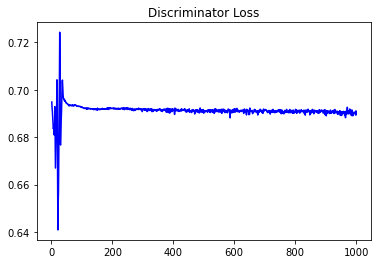

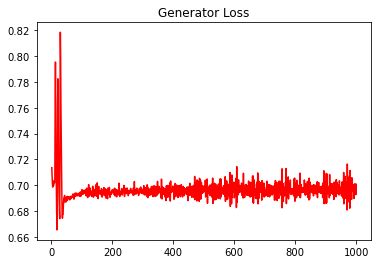

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3039822251710323


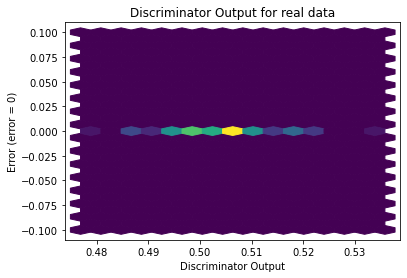

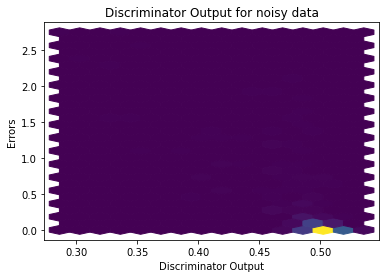

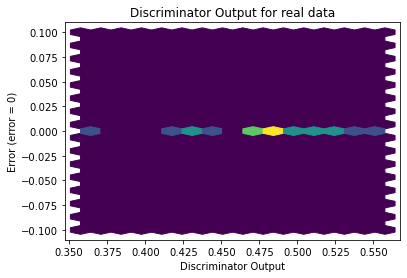

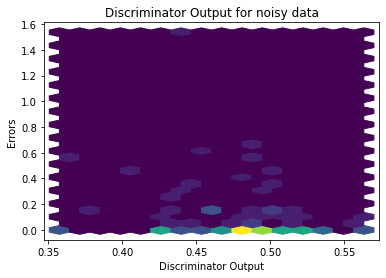

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


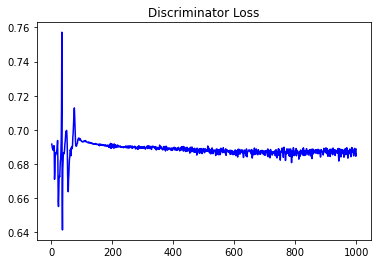

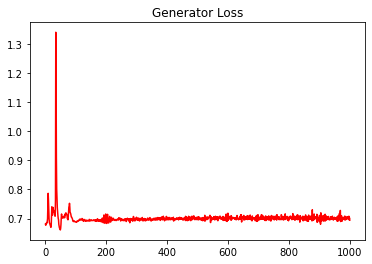

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.33279254193695196


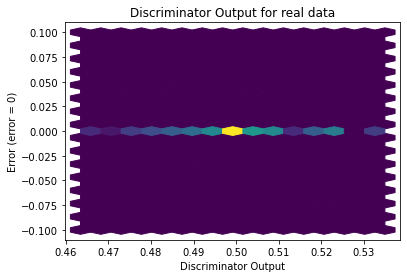

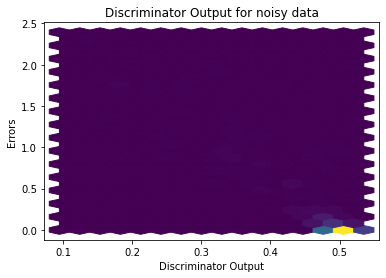

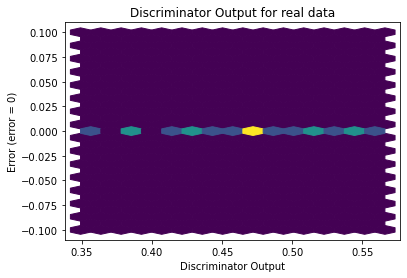

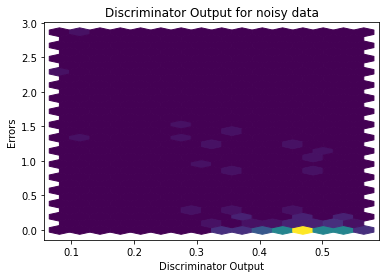

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6186]], requires_grad=True)
